# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

In [5]:
train_dataset = get_train_input("./training/reference/pipeline_new.config")

2021-12-25 10:25:40.308177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


INFO:tensorflow:Reading unweighted datasets: ['./training/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord', './training/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord', './training/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord', './training/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', './training/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', './training/segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord', './training/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', './training/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord', './training/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord', './training/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord', './training/segment-10226164909075980558_180_000_200_000_with_cam

INFO:tensorflow:Number of filenames to read: 75
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.


2021-12-25 10:25:40.346796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-25 10:25:40.347515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-12-25 10:25:40.348548: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-25 10:25:40.350608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.


2021-12-25 10:26:09.543598: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 67108864 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:26:09.543665: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 67108864
2021-12-25 10:26:09.579766: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 60398080 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:26:09.579823: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 60398080
2021-12-25 10:26:09.625865: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 54358272 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:26:09.625930: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 54358272
2021-12-25 10:26:09.692844: E tensorflow/stream_exec

2021-12-25 10:28:38.233011: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:28:38.233081: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:28:51.751500: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:28:51.751547: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:28:51.751565: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:28:51.751572: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:28:51.751577: I tensorflow/core/common_

2021-12-25 10:29:05.190105: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:29:05.190181: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:29:18.629410: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:29:18.629460: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:29:32.071534: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:29:32.071579: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:29:45.512006: E tensorflow/strea

2021-12-25 10:29:58.950592: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:29:58.950666: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:30:12.389583: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:30:12.389632: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:30:25.832306: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:30:25.832377: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:30:39.271373: E tensorflow/strea

2021-12-25 10:30:52.711468: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:30:52.711540: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:31:06.151898: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:31:06.152001: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:31:19.589810: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:31:19.589866: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:31:33.031696: E tensorflow/strea

2021-12-25 10:32:40.233205: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:32:40.233276: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:32:53.671551: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:32:53.671622: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:33:07.111773: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:33:07.111836: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:33:20.550197: E tensorflow/strea

2021-12-25 10:33:33.992579: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:33:33.992646: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:33:47.429993: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:33:47.430039: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:34:00.871257: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:34:00.871308: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:34:14.310642: E tensorflow/strea

2021-12-25 10:34:27.753099: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:34:27.753191: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:34:41.191694: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:34:41.191761: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:34:41.191779: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:34:41.191786: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:34:41.191792: I tensorflow/core/common_

2021-12-25 10:34:54.637459: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:34:54.637601: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:35:08.070077: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:35:08.070122: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:35:08.070140: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:35:08.070147: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:35:08.070153: I tensorflow/core/common_

2021-12-25 10:35:21.511090: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:35:21.511153: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:35:34.950653: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:35:34.950700: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:35:48.391452: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:35:48.391507: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:36:01.830169: E tensorflow/strea

2021-12-25 10:36:42.233079: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:36:42.233163: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:36:55.671441: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:36:55.671496: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:36:55.671517: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:36:55.671525: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:36:55.671531: I tensorflow/core/common_

2021-12-25 10:37:09.111150: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:37:09.111214: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:37:22.582653: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:37:22.582699: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:37:36.073347: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:37:36.073440: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:37:49.511451: E tensorflow/strea

2021-12-25 10:38:02.952406: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:38:02.952471: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:38:16.392732: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:38:16.392797: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:38:16.392815: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:38:16.392822: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:38:16.392828: I tensorflow/core/common_

2021-12-25 10:38:29.829809: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:38:29.829860: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:38:43.354979: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:38:43.355046: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:38:56.801487: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:38:56.801558: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:39:10.233069: E tensorflow/strea

2021-12-25 10:41:11.190330: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:41:11.190373: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:41:24.629654: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:41:24.629701: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:41:38.071602: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:41:38.071649: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:41:51.510562: E tensorflow/strea

2021-12-25 10:42:58.711722: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:42:58.711794: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:43:12.150562: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:43:12.150606: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:43:12.150624: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:43:12.150631: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:43:12.150637: I tensorflow/core/common_

2021-12-25 10:43:25.592980: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:43:25.593026: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:43:39.030166: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:43:39.030213: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:43:39.030232: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:43:39.030239: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:43:39.030246: I tensorflow/core/common_

2021-12-25 10:43:52.472198: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:43:52.472264: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:44:05.910527: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:44:05.910572: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:44:05.910590: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:44:05.910596: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:44:05.910602: I tensorflow/core/common_

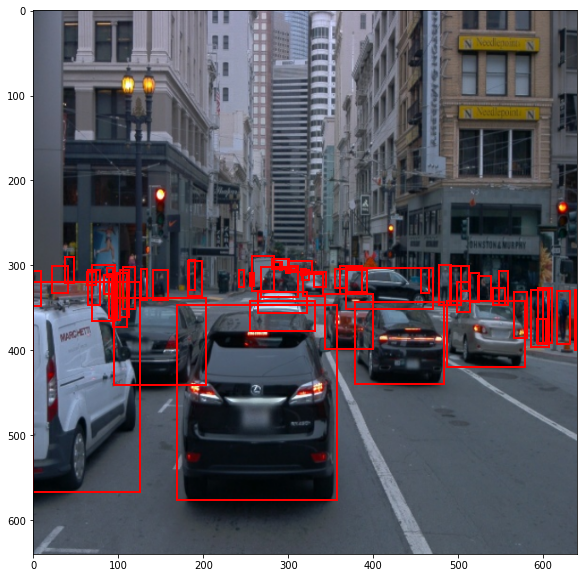

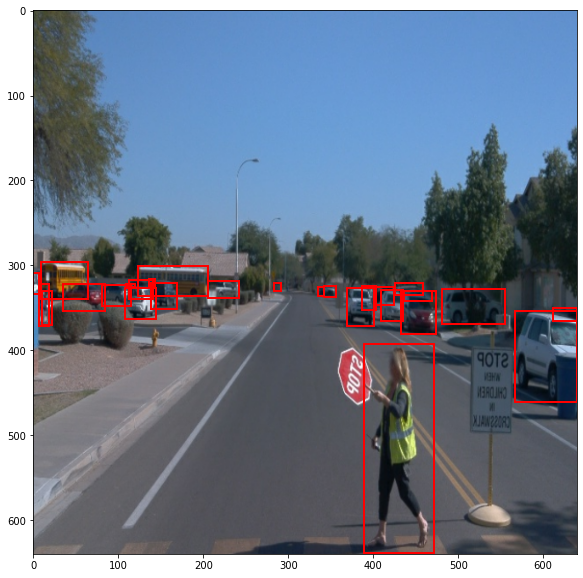

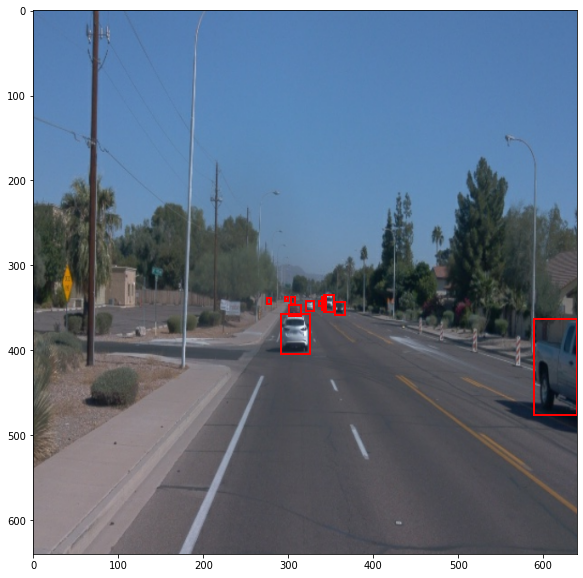

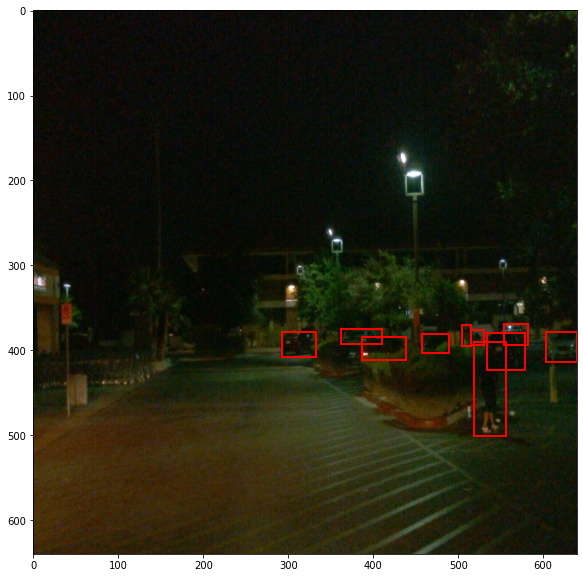

2021-12-25 10:44:19.440451: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:44:19.440500: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:44:32.870467: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:44:32.870517: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:44:46.310465: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:44:46.310512: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:44:59.749804: E tensorflow/strea

2021-12-25 10:45:13.190471: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:45:13.190544: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:45:26.632477: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:45:26.632525: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:45:40.072539: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:45:40.072587: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:45:53.511590: E tensorflow/strea

2021-12-25 10:46:06.953175: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:46:06.953233: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:46:20.393531: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:46:20.393595: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:46:20.393634: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:46:20.393641: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:46:20.393657: I tensorflow/core/common_

2021-12-25 10:46:33.830636: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:46:33.830685: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:46:47.273887: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:46:47.273928: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:46:47.273946: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (gpu_host_bfc) ran out of memory trying to allocate 18.75MiB (rounded to 19660800)requested by op 
2021-12-25 10:46:47.273953: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for gpu_host_bfc
2021-12-25 10:46:47.273960: I tensorflow/core/common_

2021-12-25 10:47:00.791821: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:47:00.791870: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:47:14.230757: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:47:14.230820: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:47:27.671278: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:47:27.671326: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:47:41.111724: E tensorflow/strea

2021-12-25 10:48:48.393734: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:48:48.393798: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:49:01.832782: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:49:01.832853: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:49:15.351067: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:49:15.351133: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:49:28.791209: E tensorflow/strea

2021-12-25 10:50:09.112261: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:50:09.112314: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:50:22.554348: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:50:22.554420: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:50:35.990842: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:50:35.990896: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728
2021-12-25 10:50:49.431633: E tensorflow/strea

2021-12-25 10:51:54.870926: E tensorflow/stream_executor/cuda/cuda_driver.cc:802] failed to alloc 134217728 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-12-25 10:51:54.870986: W ./tensorflow/core/common_runtime/device/device_host_allocator.h:46] could not allocate pinned host memory of size: 134217728


In [ ]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)